In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


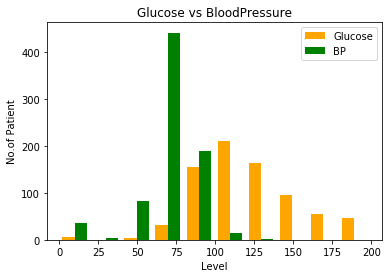

In [6]:
h1 = df['Glucose']
h2 = df['BloodPressure']
legend = ['Glucose', 'BP']
plt.hist([h1, h2], color=['orange', 'green'])
plt.xlabel("Level")
plt.ylabel("No.of Patient")
plt.legend(legend)
#plt.xticks(range(0, 3))
#plt.yticks(range(1, 2))
plt.title('Glucose vs BloodPressure')
plt.show()

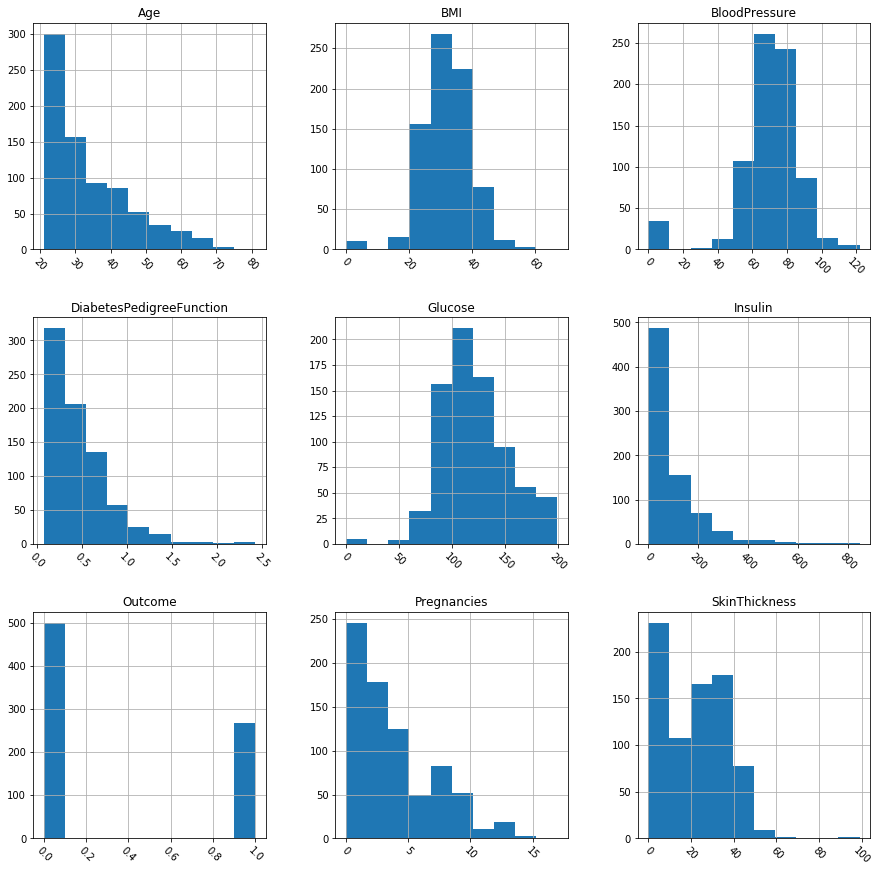

In [7]:
# Plot histogram grid
df.hist(figsize=(15,15), xrot=-45, bins=10) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

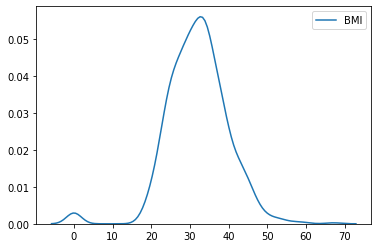

In [8]:
# Make default density plot
sns.kdeplot(df['BMI'])
#sns.plt.show()

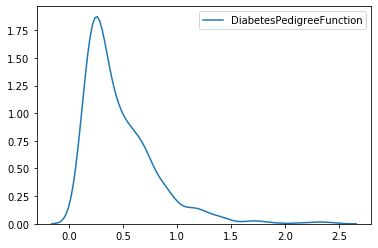

In [9]:
sns.kdeplot(df['DiabetesPedigreeFunction'])

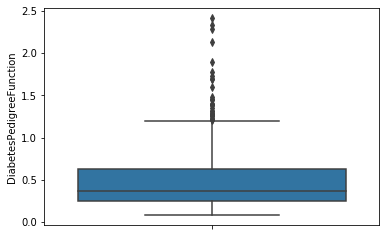

In [10]:
# Make boxplot for one group only
sns.boxplot( y=df["DiabetesPedigreeFunction"] )

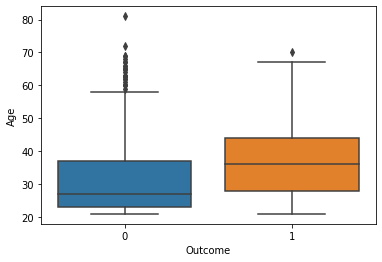

In [11]:
sns.boxplot( x=df["Outcome"], y=df["Age"] )
#sns.plt.show()

In [114]:
df = df.sample(frac=1).reset_index(drop=True)

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
x=df.iloc[:,df.columns !='Outcome']
y=df.iloc[:,df.columns =='Outcome']

In [117]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3)

In [136]:
x_train.shape
y_test

,Outcome
314,0
704,0
60,0
619,0
187,0
...,...
610,1
349,0
80,0
581,0


In [119]:
y_test.shape

(231, 1)

In [120]:
from sklearn.preprocessing import minmax_scale

In [121]:
X_train=minmax_scale(x_train)

In [122]:
X_test=minmax_scale(x_test)

# SVM

In [123]:
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix

In [124]:
model1=svm.SVC()

In [125]:
model1.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [126]:
predict1=model1.predict(X_test)

In [127]:
svm=accuracy_score(y_test,predict1)
print(svm)

0.7662337662337663


In [128]:
cm= confusion_matrix(y_test, predict1)
cm

array([[134,  13],
       [ 41,  43]], dtype=int64)

# LogisticRegression

In [129]:
from sklearn.linear_model import LogisticRegression

In [130]:
lr=LogisticRegression()
lr.fit(X_train, y_train)
predict2=lr.predict(X_test)

In [131]:
lr=accuracy_score(y_test,predict2)
print(lr)

0.7359307359307359


In [132]:
cm2= confusion_matrix(y_test, predict2)
cm2

array([[133,  14],
       [ 47,  37]], dtype=int64)

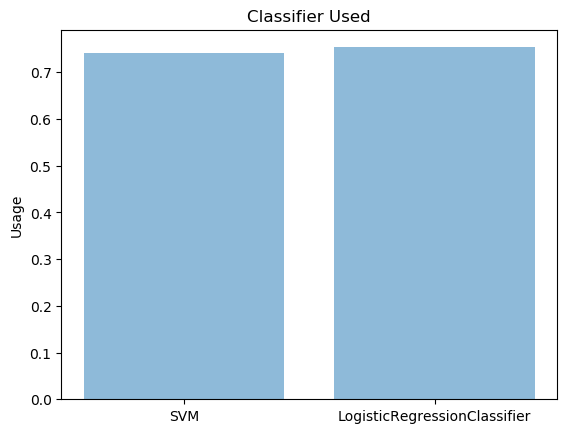

In [113]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('SVM','LogisticRegressionClassifier')
y_pos = np.arange(len(objects))
performance = [svm,lr]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Classifier Used')

plt.show()